In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

C:\Users\panch\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Replace 'hh.xlsx' with the actual file path of your Excel file
file_path = 'H2.xlsx'

# Read the specific sheet named '18-20' into a DataFrame
data= pd.read_excel(file_path, sheet_name='21-23')

# Display the DataFrame


print(data.shape)

(2063, 15)


In [3]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,list_year,listing_price,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2013.0,145000.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,2003.0,84995.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,1998.0,46500.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,2013.0,86000.0,3
4,"17 Benton Avenue, Birmingham, B11 1UA",B11,4.0,2.0,NaN,FREEHOLD,MID TERRACE PROPERTY,Sept,2023,120000,"139,000 - 209,000",74.0,NaN,NaN,9


In [4]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

bath 0.0175  % missing values
beds 0.0839  % missing values
rep 0.2007  % missing values
area 0.1134  % missing values
list_year 0.5909  % missing values
listing_price 0.5909  % missing values


In [5]:
data.isnull().sum()

Field1                0
area_code             0
bath                 36
beds                173
rep                 414
hold_type             0
property_type         0
sold_month            0
sold_year             0
sold_price            0
estimated_price       0
area                234
list_year          1219
listing_price      1219
type_property         0
dtype: int64

In [6]:
data.dtypes

Field1              object
area_code           object
bath               float64
beds               float64
rep                float64
hold_type           object
property_type       object
sold_month          object
sold_year            int64
sold_price           int64
estimated_price     object
area               float64
list_year          float64
listing_price      float64
type_property        int64
dtype: object

In [7]:
columns_to_drop = ['list_year', 'listing_price']
data = data.drop(columns=columns_to_drop)
print(data.isnull().sum())

Field1               0
area_code            0
bath                36
beds               173
rep                414
hold_type            0
property_type        0
sold_month           0
sold_year            0
sold_price           0
estimated_price      0
area               234
type_property        0
dtype: int64


In [8]:
data=data.dropna()

In [9]:
print(data.isnull().sum())

Field1             0
area_code          0
bath               0
beds               0
rep                0
hold_type          0
property_type      0
sold_month         0
sold_year          0
sold_price         0
estimated_price    0
area               0
type_property      0
dtype: int64


In [10]:
# Fill missing values with appropriate strategies
'''data['rep'].fillna(data['rep'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['bath'].fillna(data['bath'].median(), inplace=True)'''

"data['rep'].fillna(data['rep'].median(), inplace=True)\ndata['beds'].fillna(data['beds'].median(), inplace=True)\ndata['bath'].fillna(data['bath'].median(), inplace=True)"

In [11]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [12]:
#data['area']= data['area'].interpolate(method = 'linear',axis=0).ffill().bfill()

In [13]:
data['beds'] = data['beds'].astype(float)
data['bath'] = data['bath'].astype(float)
data['area'] = data['area'].astype(float)

In [14]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [15]:
data.isnull().sum()

Field1             0
area_code          0
bath               0
beds               0
rep                0
hold_type          0
property_type      0
sold_month         0
sold_year          0
sold_price         0
estimated_price    0
area               0
type_property      0
dtype: int64

In [16]:
duplicate_rows=data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (1, 13)


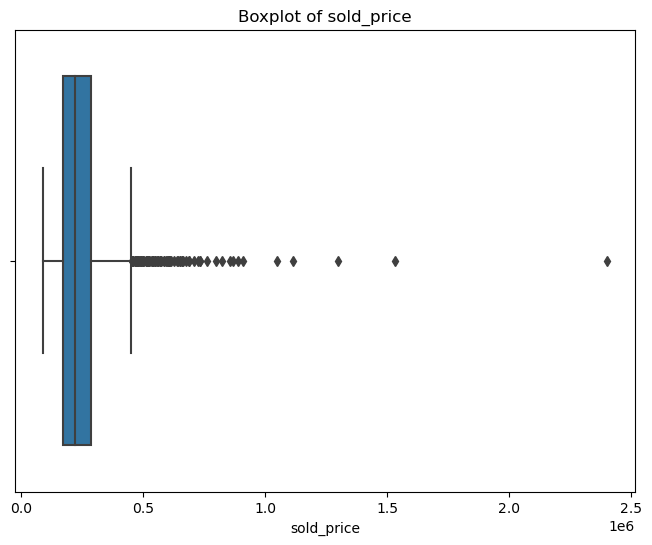

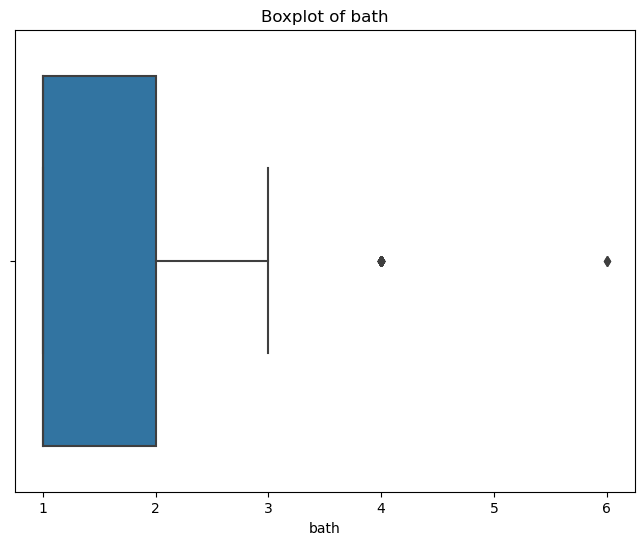

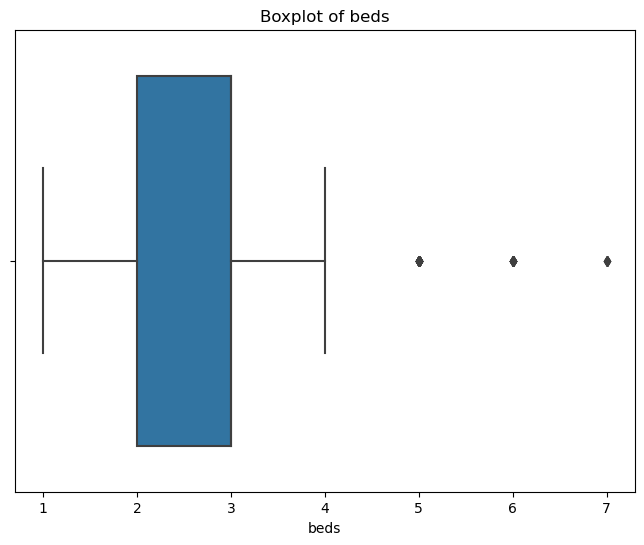

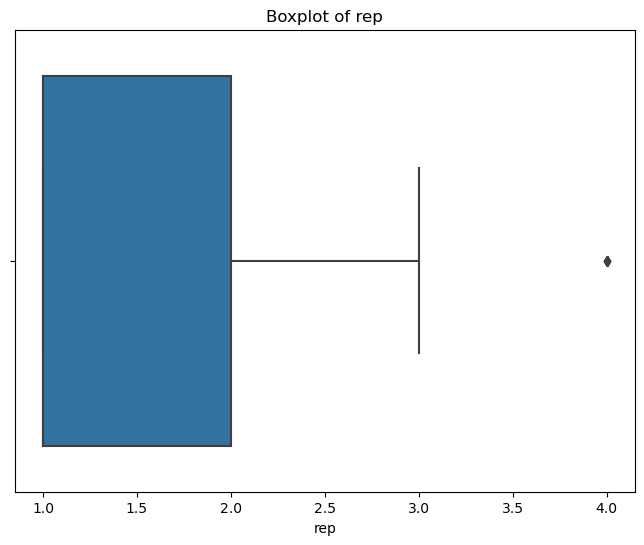

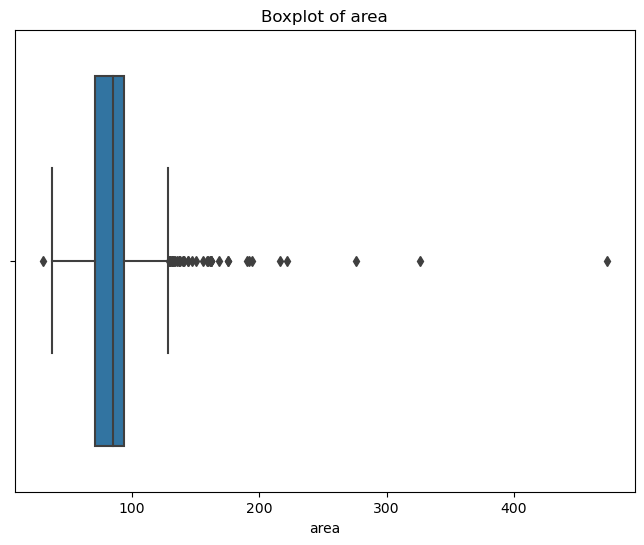

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_outliers(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

# Visualize outliers in the 'sold_price' column
visualize_outliers(data, 'sold_price')
visualize_outliers(data, 'bath')
visualize_outliers(data, 'beds')
visualize_outliers(data, 'rep')
visualize_outliers(data, 'area')


In [18]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

bath                  1.0
beds                  1.0
rep                   1.0
sold_year             1.0
sold_price       112000.0
area                 23.0
type_property         4.0
dtype: float64


In [19]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


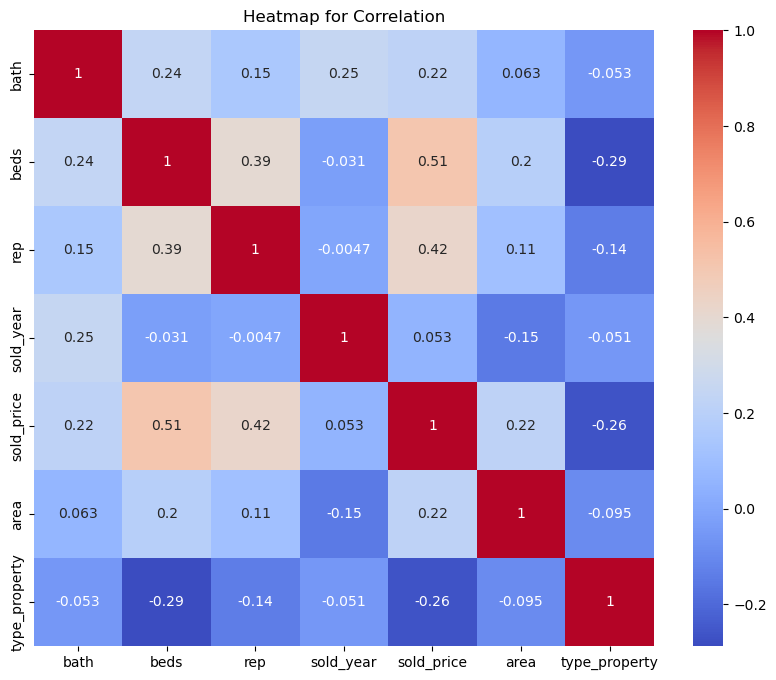

In [20]:
# Visualization 7: Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation')
plt.show()


In [21]:
# Function to handle outliers using robust statistics
'''def handle_outliers_robust(data, column_name):
    # Calculate robust statistics
    median = data[column_name].median()
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    
    # Set bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Replace outliers with median
    data[column_name] = np.where(data[column_name] < lower_bound, median, data[column_name])
    data[column_name] = np.where(data[column_name] > upper_bound, median, data[column_name])
    
    return data

# Handle outliers using robust statistics
data = handle_outliers_robust(data, 'sold_price')

# Visualize the data after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sold_price'])
plt.title('Boxplot of sold_price after Handling Outliers (Robust Statistics)')
plt.show()

# Display the DataFrame after handling outliers
print(data)'''

"def handle_outliers_robust(data, column_name):\n    # Calculate robust statistics\n    median = data[column_name].median()\n    q1 = data[column_name].quantile(0.25)\n    q3 = data[column_name].quantile(0.75)\n    iqr = q3 - q1\n    \n    # Set bounds for outliers\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    # Replace outliers with median\n    data[column_name] = np.where(data[column_name] < lower_bound, median, data[column_name])\n    data[column_name] = np.where(data[column_name] > upper_bound, median, data[column_name])\n    \n    return data\n\n# Handle outliers using robust statistics\ndata = handle_outliers_robust(data, 'sold_price')\n\n# Visualize the data after handling outliers\nplt.figure(figsize=(8, 6))\nsns.boxplot(x=data['sold_price'])\nplt.title('Boxplot of sold_price after Handling Outliers (Robust Statistics)')\nplt.show()\n\n# Display the DataFrame after handling outliers\nprint(data)"

In [22]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [23]:
'''def handle_outliers(data, column_name, method='winsorize', threshold=0.95):
    # Identify outliers using IQR
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Handle outliers based on the chosen method
    if method == 'remove':
        data = data[(df[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    elif method == 'transform_log':
        data[column_name] = np.log1p(data[column_name])
    elif method == 'winsorize':
        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])
    else:
        raise ValueError("Invalid method. Choose 'remove', 'transform_log', or 'winsorize'.")
    
    return data

# Choose a method to handle outliers
data = handle_outliers(data, 'sold_price', method='transform_log')

# Display the DataFrame after handling outliers
print(data)'''

'def handle_outliers(data, column_name, method=\'winsorize\', threshold=0.95):\n    # Identify outliers using IQR\n    q1 = data[column_name].quantile(0.25)\n    q3 = data[column_name].quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    \n    # Handle outliers based on the chosen method\n    if method == \'remove\':\n        data = data[(df[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]\n    elif method == \'transform_log\':\n        data[column_name] = np.log1p(data[column_name])\n    elif method == \'winsorize\':\n        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])\n        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])\n    else:\n        raise ValueError("Invalid method. Choose \'remove\', \'transform_log\', or \'winsorize\'.")\n    \n    return data\n\n# Choose a method to handle outliers\ndata = handle_outliers

In [24]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

bath                  1.0
beds                  1.0
rep                   1.0
sold_year             1.0
sold_price       112000.0
area                 23.0
type_property         4.0
dtype: float64


In [25]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  7


,bath,beds,rep,sold_year,sold_price,area,type_property
0,1.0,3.0,1.0,2023,245000,108.0,2
1,1.0,3.0,1.0,2023,181500,92.0,4
2,1.0,3.0,2.0,2023,182000,97.0,2
3,1.0,3.0,1.0,2023,170000,82.0,3
5,1.0,3.0,2.0,2023,292000,94.0,2


In [26]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

In [27]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [28]:
discrete_feature

['bath', 'beds', 'rep', 'sold_year', 'type_property']

In [29]:
data[discrete_feature].head()

,bath,beds,rep,sold_year,type_property
0,1.0,3.0,1.0,2023,2
1,1.0,3.0,1.0,2023,4
2,1.0,3.0,2.0,2023,2
3,1.0,3.0,1.0,2023,3
5,1.0,3.0,2.0,2023,2


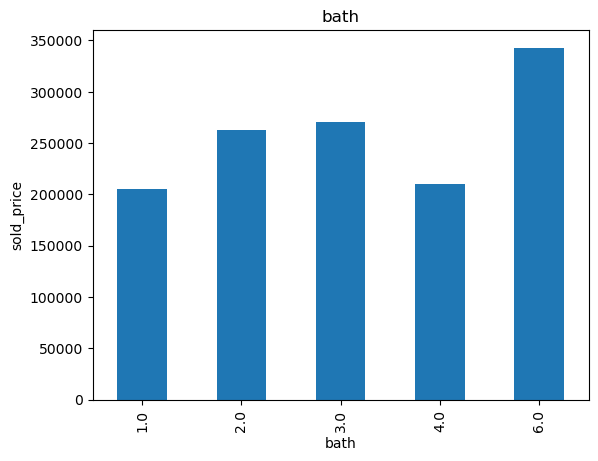

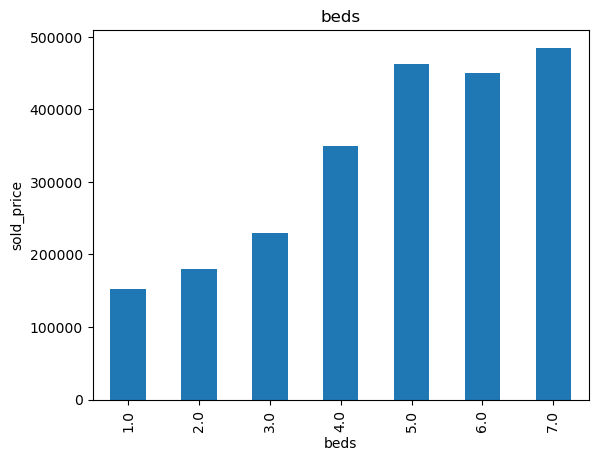

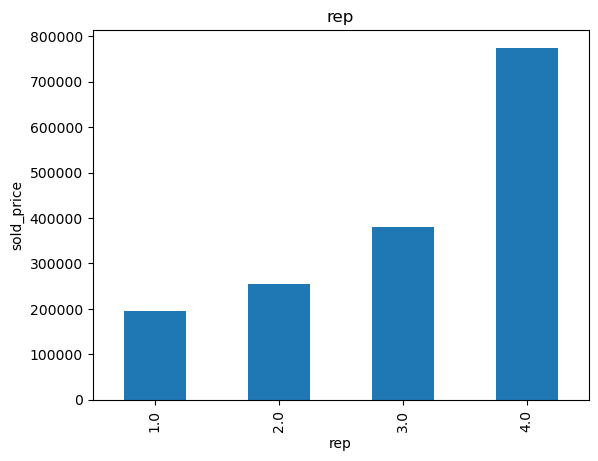

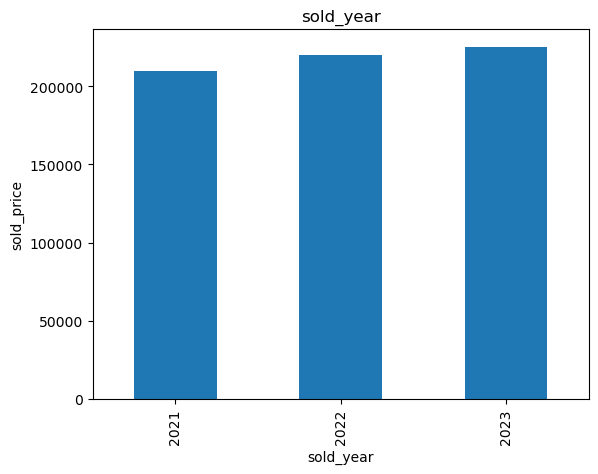

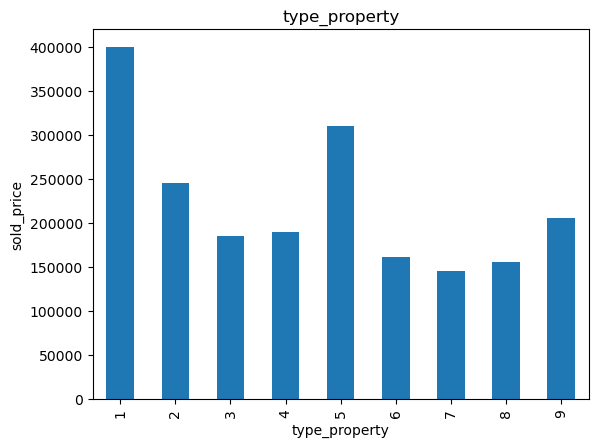

In [30]:
for feature in discrete_feature:
    data=data.copy()
    data.groupby(feature)['sold_price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('sold_price')
    plt.title(feature)
    plt.show()

In [31]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2


In [55]:
# Display descriptive statistics
descriptive_stats = data.describe()

# Print the results
print(descriptive_stats.to_string())

              bath         beds          rep    sold_year    sold_price         area  type_property
count  1503.000000  1503.000000  1503.000000  1503.000000  1.503000e+03  1503.000000    1503.000000
mean      1.473719     2.838989     1.469727  2022.408516  2.506889e+05    83.848303       3.967399
std       0.805570     0.844436     0.602023     0.802448  1.379694e+05    23.051171       2.668228
min       1.000000     1.000000     1.000000  2021.000000  9.000000e+04    30.000000       1.000000
25%       1.000000     2.000000     1.000000  2022.000000  1.730000e+05    71.000000       2.000000
50%       1.000000     3.000000     1.000000  2023.000000  2.200000e+05    85.000000       3.000000
75%       2.000000     3.000000     2.000000  2023.000000  2.850000e+05    94.000000       6.000000
max       6.000000     7.000000     4.000000  2023.000000  2.400000e+06   473.000000       9.000000


In [32]:
# Create a dictionary mapping each postcode to its adjacent area
postcode_to_area = {
    'B25': 'Yardley',
    'B23': 'Erdington',
    'B17': 'Edgbaston',
    'B67': 'Smethwick',
    'B18': 'Winson Green',
    'B31': 'Northfield',
    'B14': 'Kings Heath',
    'B43': 'Great Barr',
    'B11': 'Sparkhill',
    'B24': 'Erdington',
    'B29': 'Selly Oak',
    'B44': 'Perry Barr',
    'B5': 'Digbeth',
    'B37': 'Chelmsley Wood',
    'B30': 'Bournville',
    'B38': 'Kings Norton',
    'B20': 'Handsworth Wood',
    'B28': 'Hall Green',
    'B90': 'Solihull',
    'B1': 'City Centre',
    'B32': 'Woodgate',
    'B73': 'New Oscott',
    'B8': 'Alum Rock',
    'B7': 'Nechells',
    'B33': 'Kitts Green',
    'B13': 'Moseley',
    'B45': 'Rendal',
    'B34': 'Shard End',
    'B21': 'Handsworth Wood',
    'B6': 'Aston',
    'B71': 'West Bromwich',
    'B47': 'Hollywood',
    'B12': 'Balsall Heath',
    'B26': 'Yardley',
    'B19': 'Lozells',
    'B42': 'Perry Barr',
    'B27': 'Acocks Green',
    'B15': 'Edgbaston',
    'B16': 'Edgbaston',
    'B92': 'Solihull',
    'B36': 'Castle Bromwich',
    'B35': 'Castle Vale',
    'B9': 'Bordesley Green',
    'B72': 'Sutton Coldfield',
    'B10': 'Small Heath',
    'B2': 'City Centre',
    'B76': 'Sutton Coldfield',
    'B66': 'Smethwick',
    'B4': 'City Centre',
    'B48': 'Alvechurch',
    'B3': 'City Centre',
    'B68': 'Langley',
    'B46': 'Coleshill',
    'B74': 'Four Oaks'
}

# Create a new column 'Adjacent_Area' based on the mapping
data['Adjacent_Area'] = data['area_code'].map(postcode_to_area)

# Display the updated DataFrame
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property,Adjacent_Area
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2,Great Barr
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4,Northfield
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2,Handsworth Wood
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3,Castle Bromwich
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2,Handsworth Wood


In [33]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with 'sold_month' and 'sold_year' columns

# Convert 'sold_month' and 'sold_year' to datetime
'''data['sold_date'] = pd.to_datetime(data['sold_year'].astype(str) + '-' + data['sold_month'].astype(str) + '-1')

# Extract additional features and format 'quarter' column
data['quarter'] = data['sold_date'].dt.to_period("Q").astype(str)

# Modify the 'quarter' column to only consist of 'q1', 'q2', 'q3', 'q4'
data['quarter'] = 'q' + data['quarter'].str[-1]

# Convert 'quarter' to categorical type
data['quarter'] = data['quarter'].astype('category')

# Convert categorical to numerical using label encoding
data['quarter'] = data['quarter'].cat.codes

# Drop the 'sold_date' column
data = data.drop('sold_date', axis=1)

# Display the updated DataFrame
print(data.head())'''


'data[\'sold_date\'] = pd.to_datetime(data[\'sold_year\'].astype(str) + \'-\' + data[\'sold_month\'].astype(str) + \'-1\')\n\n# Extract additional features and format \'quarter\' column\ndata[\'quarter\'] = data[\'sold_date\'].dt.to_period("Q").astype(str)\n\n# Modify the \'quarter\' column to only consist of \'q1\', \'q2\', \'q3\', \'q4\'\ndata[\'quarter\'] = \'q\' + data[\'quarter\'].str[-1]\n\n# Convert \'quarter\' to categorical type\ndata[\'quarter\'] = data[\'quarter\'].astype(\'category\')\n\n# Convert categorical to numerical using label encoding\ndata[\'quarter\'] = data[\'quarter\'].cat.codes\n\n# Drop the \'sold_date\' column\ndata = data.drop(\'sold_date\', axis=1)\n\n# Display the updated DataFrame\nprint(data.head())'

In [34]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with 'sold_month' and 'sold_year' columns

# Convert 'sold_month' and 'sold_year' to datetime
data['sold_date'] = pd.to_datetime(data['sold_year'].astype(str) + '-' + data['sold_month'].astype(str) + '-1')

# Extract additional features and format 'quarter' column
data['quarter'] = data['sold_date'].dt.to_period("Q").astype(str)

# Modify the 'quarter' column to only consist of 'q1', 'q2', 'q3', 'q4'
data['quarter'] = 'q' + data['quarter'].str[-1]

# Drop the 'sold_date' column
data = data.drop('sold_date', axis=1)

# Display the updated DataFrame
print(data.head())


                                     Field1 area_code  bath  beds  rep  \
0   35 Stonehurst Road, Birmingham, B43 7RA       B43   1.0   3.0  1.0   
1         33 Exe Croft, Birmingham, B31 3LB       B31   1.0   3.0  1.0   
2  24 Camplin Crescent, Birmingham, B20 1LS       B20   1.0   3.0  2.0   
3      74 Triumph Walk, Birmingham, B36 9NU       B36   1.0   3.0  1.0   
5   71 Denewood Avenue, Birmingham, B20 2AF       B20   1.0   3.0  2.0   

  hold_type           property_type sold_month  sold_year  sold_price  \
0  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      245000   
1  FREEHOLD        TERRACE PROPERTY       Sept       2023      181500   
2  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      182000   
3  FREEHOLD    END TERRACE PROPERTY       Sept       2023      170000   
5  FREEHOLD  SEMI-DETACHED PROPERTY       Sept       2023      292000   

     estimated_price   area  type_property    Adjacent_Area quarter  
0  255,000 - 282,000  108.0              2    

In [35]:
data.head()

,Field1,area_code,bath,beds,rep,hold_type,property_type,sold_month,sold_year,sold_price,estimated_price,area,type_property,Adjacent_Area,quarter
0,"35 Stonehurst Road, Birmingham, B43 7RA",B43,1.0,3.0,1.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,245000,"255,000 - 282,000",108.0,2,Great Barr,q3
1,"33 Exe Croft, Birmingham, B31 3LB",B31,1.0,3.0,1.0,FREEHOLD,TERRACE PROPERTY,Sept,2023,181500,"173,000 - 192,000",92.0,4,Northfield,q3
2,"24 Camplin Crescent, Birmingham, B20 1LS",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,182000,"206,000 - 227,000",97.0,2,Handsworth Wood,q3
3,"74 Triumph Walk, Birmingham, B36 9NU",B36,1.0,3.0,1.0,FREEHOLD,END TERRACE PROPERTY,Sept,2023,170000,"163,000 - 180,000",82.0,3,Castle Bromwich,q3
5,"71 Denewood Avenue, Birmingham, B20 2AF",B20,1.0,3.0,2.0,FREEHOLD,SEMI-DETACHED PROPERTY,Sept,2023,292000,"291,000 - 322,000",94.0,2,Handsworth Wood,q3


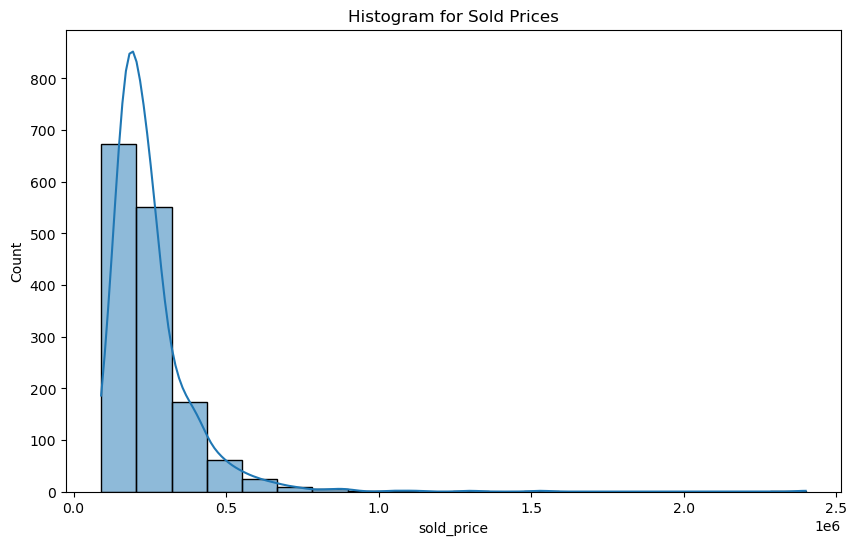

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'df'
# Replace 'df' with your actual DataFrame name

# Visualization 1: Histogram for Sold Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['sold_price'], bins=20, kde=True)
plt.title('Histogram for Sold Prices')
plt.show()


In [37]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'sold_price' column

# Define the price range bins
price_bins = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000]

# Create a new column 'price_range' based on the 'sold_price' column
data['price_range'] = pd.cut(data['sold_price'], bins=price_bins, labels=[f'{low}-{high}' for low, high in zip(price_bins[:-1], price_bins[1:])])

# Display the DataFrame with the new 'price_range' column
print(data[['sold_price', 'price_range']])


      sold_price    price_range
0         245000  200000-250000
1         181500  150000-200000
2         182000  150000-200000
3         170000  150000-200000
5         292000  250000-300000
...          ...            ...
2040      232500  200000-250000
2042      250000  200000-250000
2048      197000  150000-200000
2049      190000  150000-200000
2053      183855  150000-200000

[1503 rows x 2 columns]


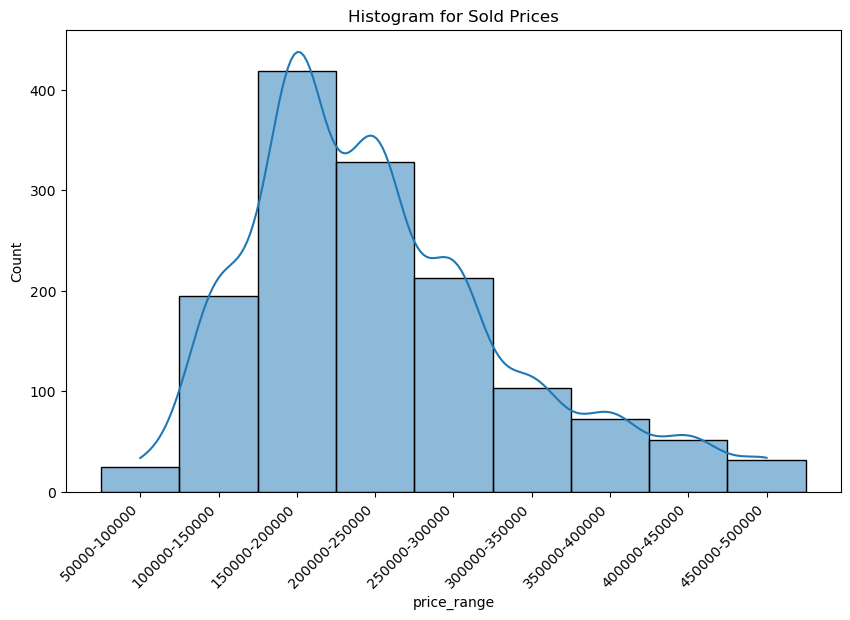

In [38]:
# Visualization 1: Histogram for Sold Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price_range'], bins=20, kde=True)
plt.title('Histogram for Sold Prices')
plt.xticks(rotation=45, ha='right')
plt.show()


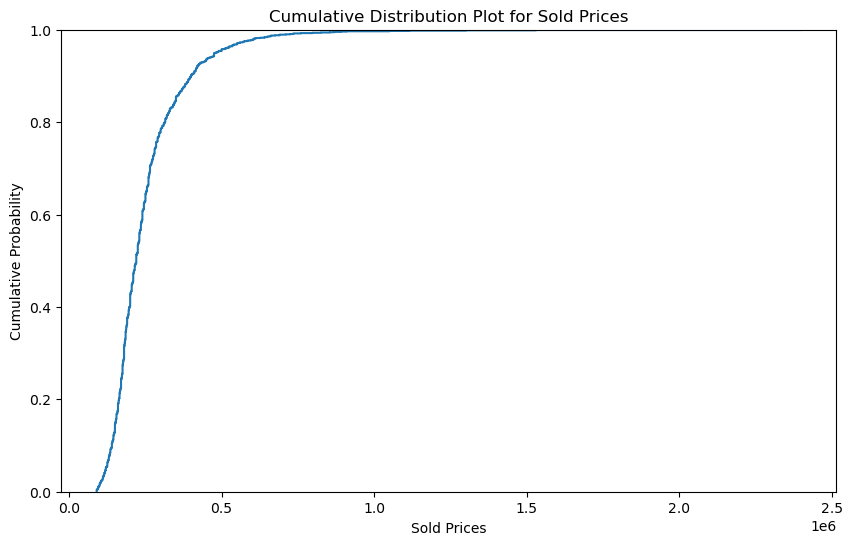

In [39]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['sold_price'])
plt.title('Cumulative Distribution Plot for Sold Prices')
plt.xlabel('Sold Prices')
plt.ylabel('Cumulative Probability')
plt.show()

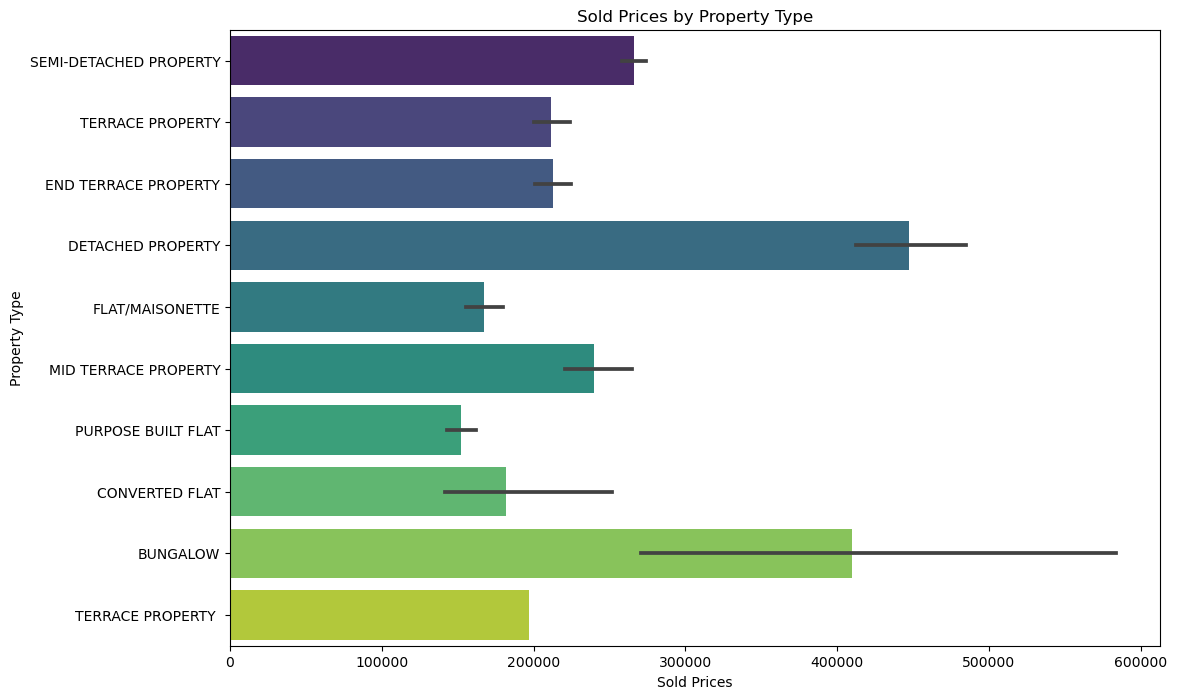

In [40]:
# Visualization 2: Horizontal Bar Chart for Sold Prices by Property Type
plt.figure(figsize=(12, 8))
sns.barplot(x='sold_price', y='property_type', data=data, palette='viridis')
plt.title('Sold Prices by Property Type')
plt.xlabel('Sold Prices')
plt.ylabel('Property Type')
plt.show()

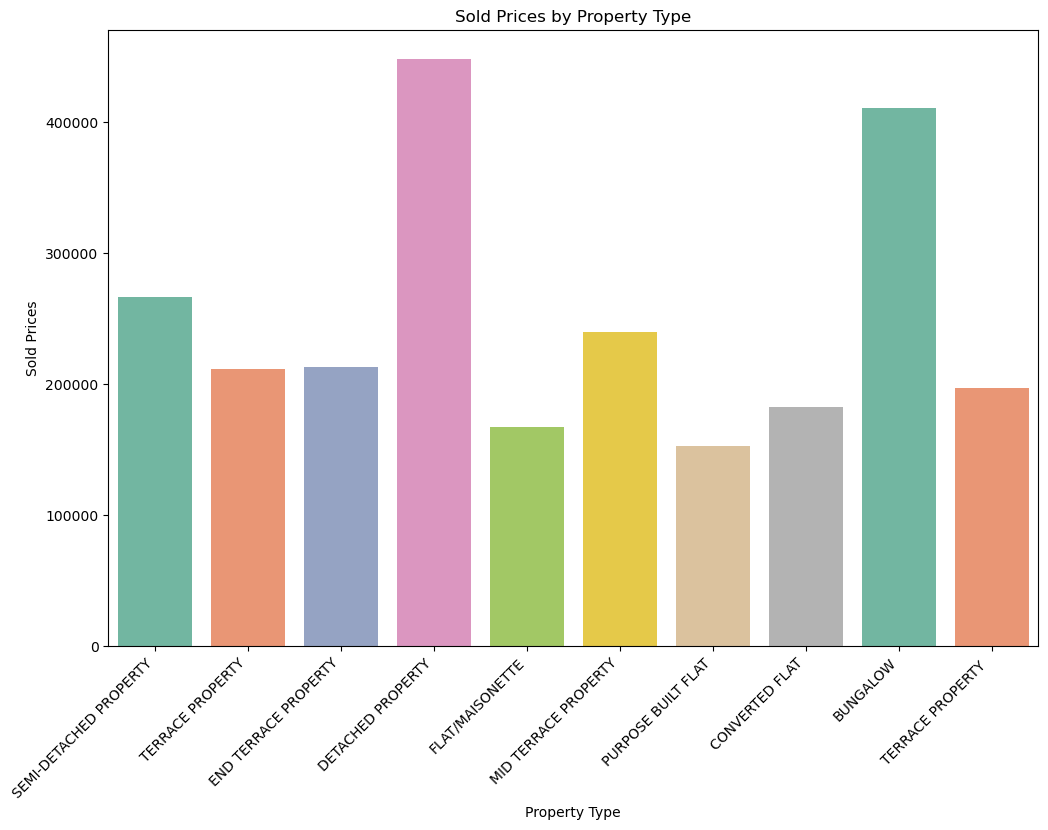

In [41]:
# Visualization 3: Grouped Bar Chart for Sold Prices by Property Type
plt.figure(figsize=(12, 8))
sns.barplot(x='property_type', y='sold_price', data=data, palette='Set2', ci=None)
plt.title('Sold Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Sold Prices')
plt.xticks(rotation=45, ha='right')
plt.show()


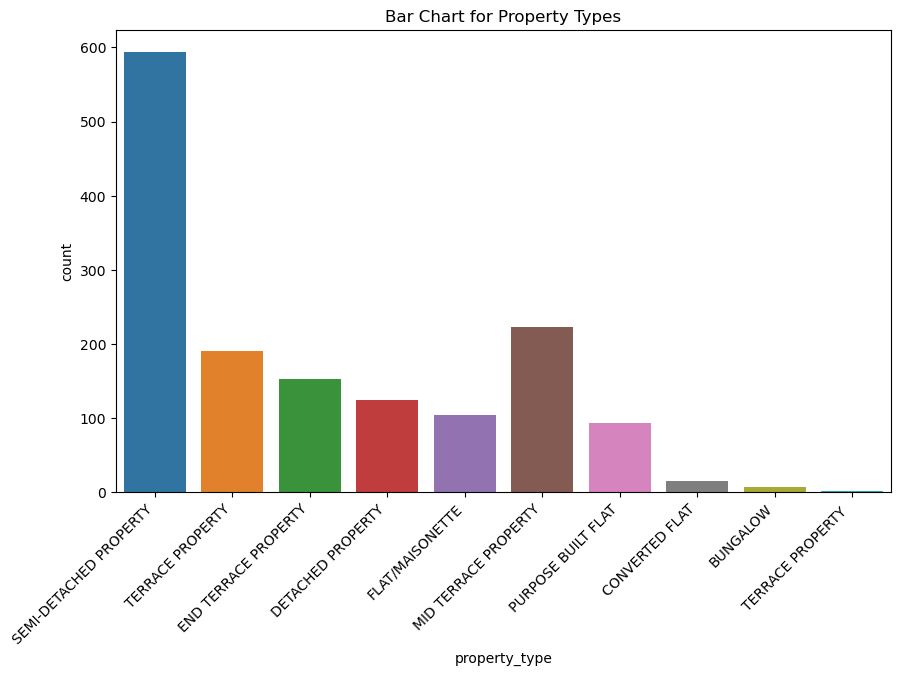

In [42]:
# Visualization 3: Bar Chart for Property Types
plt.figure(figsize=(10, 6))
sns.countplot(x='property_type', data=data)
plt.title('Bar Chart for Property Types')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

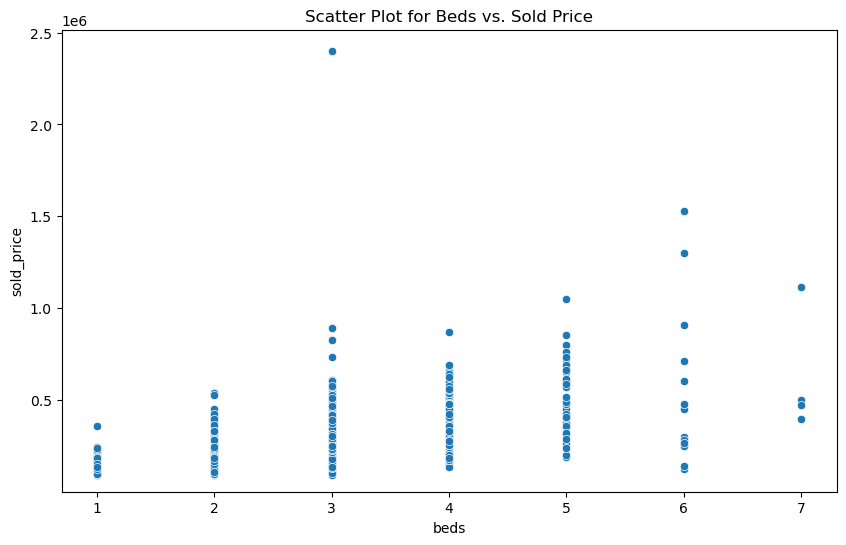

In [43]:
# Visualization 4: Scatter Plot for Beds vs. Sold Price with y-axis starting from 1

plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='sold_price', data=data)
plt.title('Scatter Plot for Beds vs. Sold Price')
plt.ylim(1, None)  # Set the lower limit of y-axis to 1
plt.show()

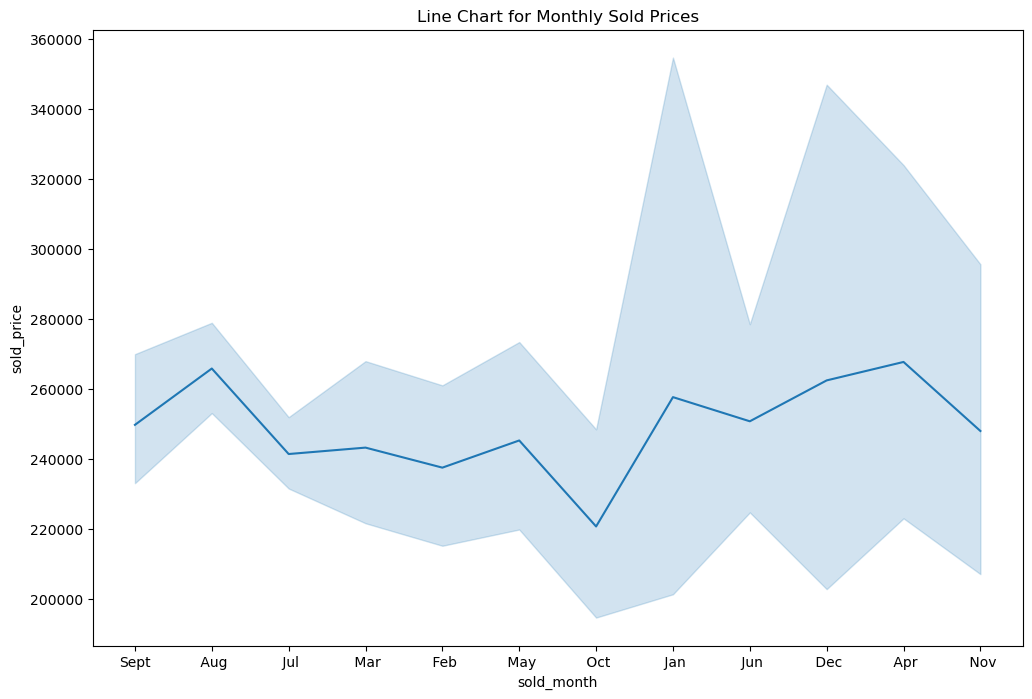

In [44]:
# Visualization 5: Line Chart for Monthly Sold Prices
plt.figure(figsize=(12, 8))
sns.lineplot(x='sold_month', y='sold_price', data=data)
plt.title('Line Chart for Monthly Sold Prices')
plt.show()


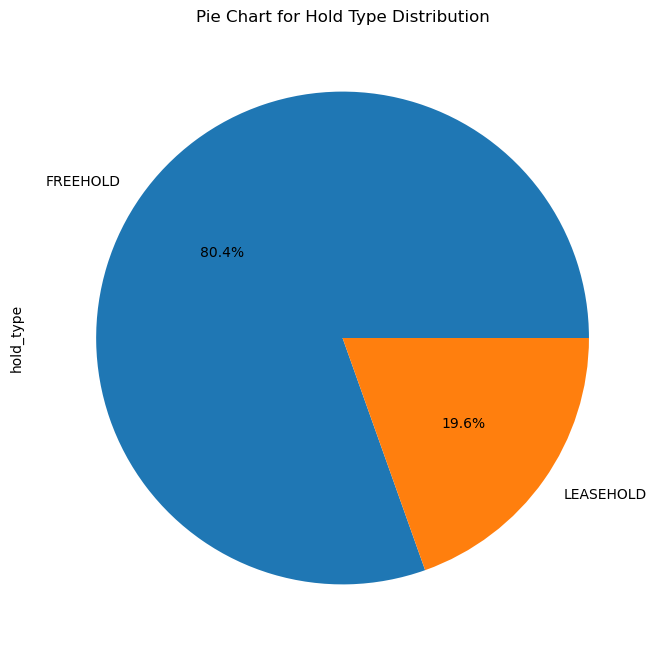

In [45]:
# Visualization 6: Pie Chart for Hold Type Distribution
plt.figure(figsize=(8, 8))
data['hold_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart for Hold Type Distribution')
plt.show()

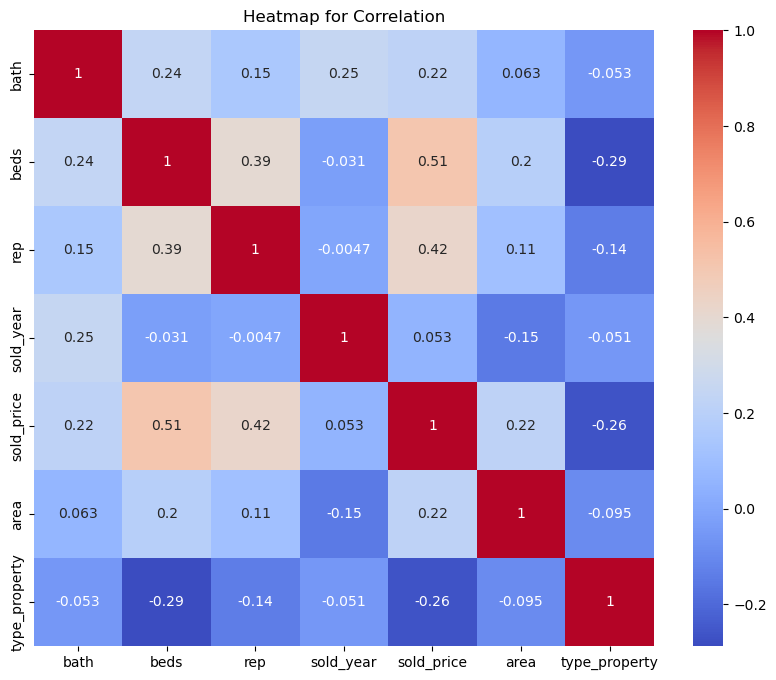

In [46]:
# Visualization 7: Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation')
plt.show()


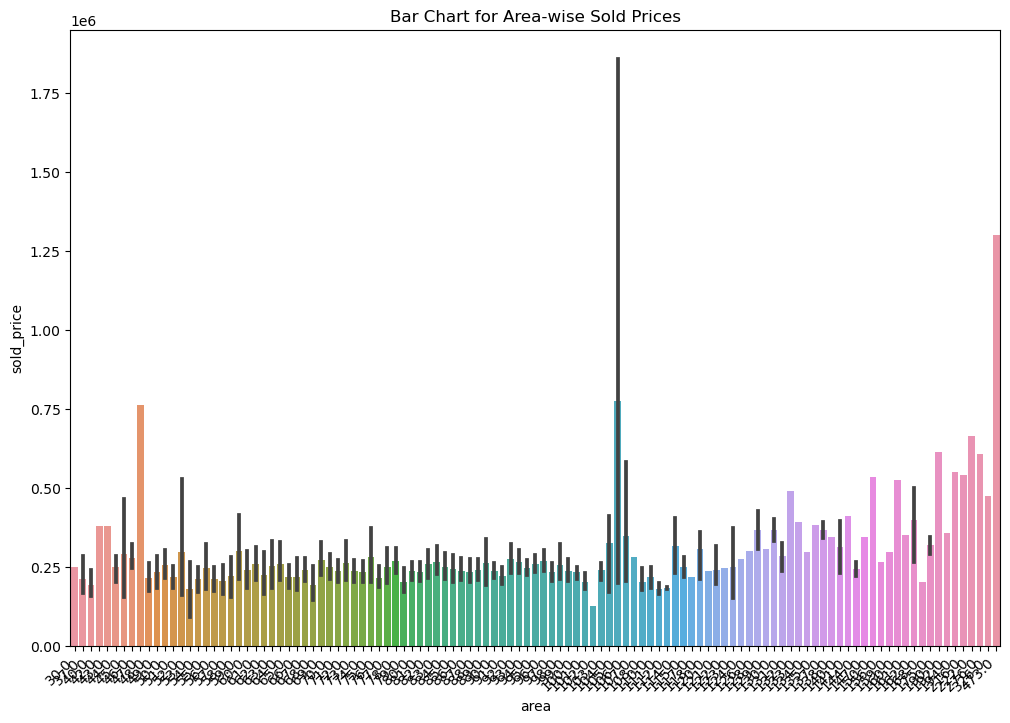

In [47]:
# Visualization 8: Bar Chart for Area-wise Sold Prices
plt.figure(figsize=(12, 8))
sns.barplot(x='area', y='sold_price', data=data)
plt.title('Bar Chart for Area-wise Sold Prices')
plt.xticks(rotation=45, ha='right')
plt.show()

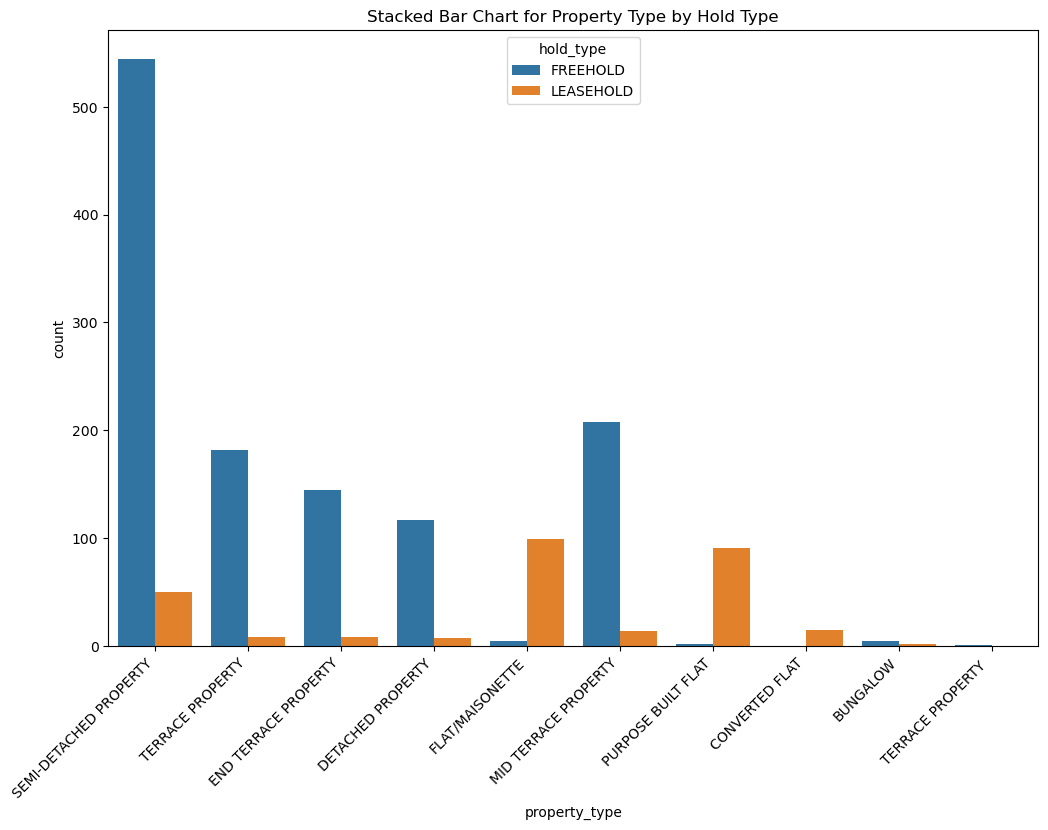

In [48]:
# Visualization 10: Stacked Bar Chart for Property Type by Hold Type
plt.figure(figsize=(12, 8))
sns.countplot(x='property_type', hue='hold_type', data=data)
plt.title('Stacked Bar Chart for Property Type by Hold Type')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1200x800 with 0 Axes>

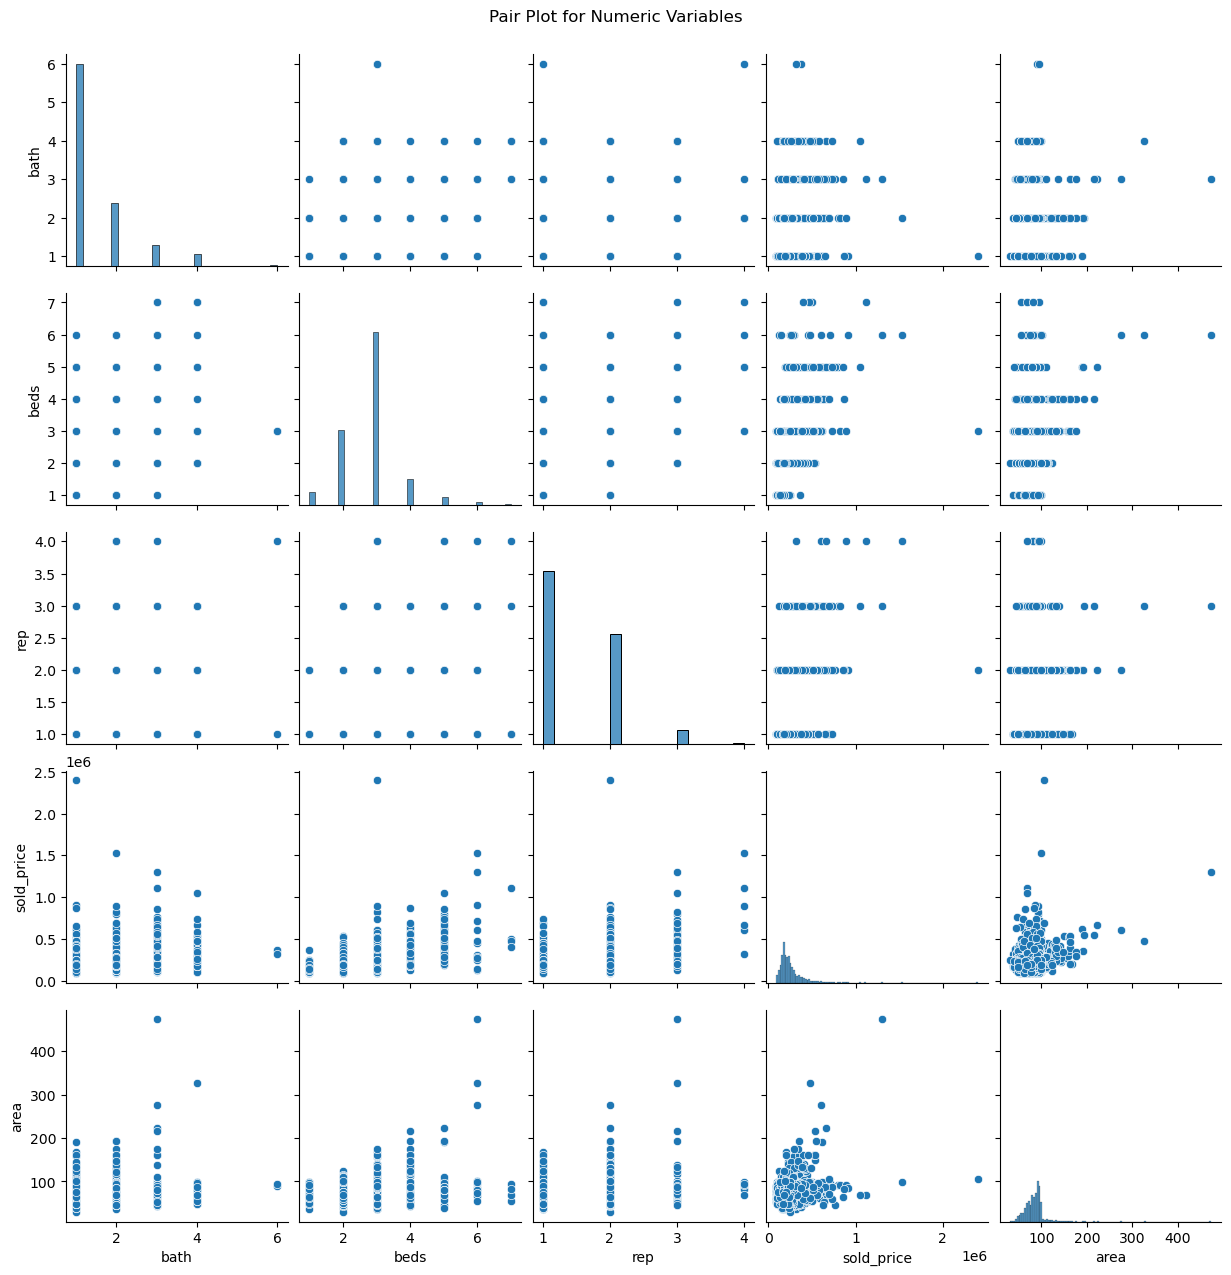

In [49]:
plt.figure(figsize=(12, 8))
numeric_vars = ['bath', 'beds', 'rep', 'sold_price', 'estimated_price', 'area']
sns.pairplot(data[numeric_vars])
plt.suptitle('Pair Plot for Numeric Variables', y=1.02)
plt.show()

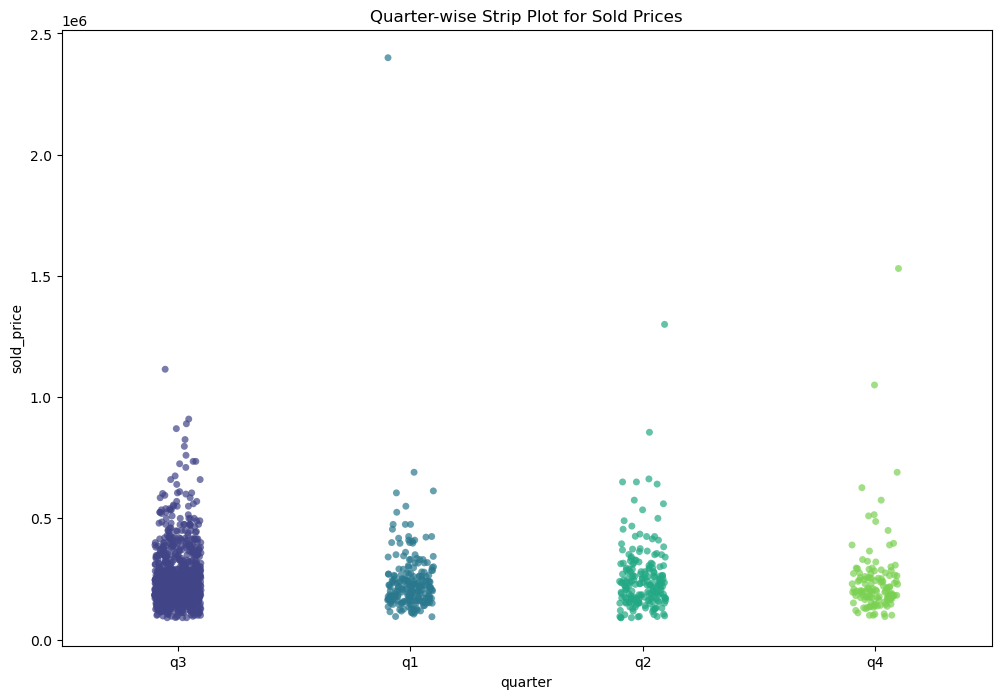

In [50]:
# Visualization: Strip Plot for Sold Prices by Quarter
plt.figure(figsize=(12, 8))
sns.stripplot(x='quarter', y='sold_price', data=data, palette='viridis', jitter=True, alpha=0.7)
plt.title('Quarter-wise Strip Plot for Sold Prices')

plt.show()

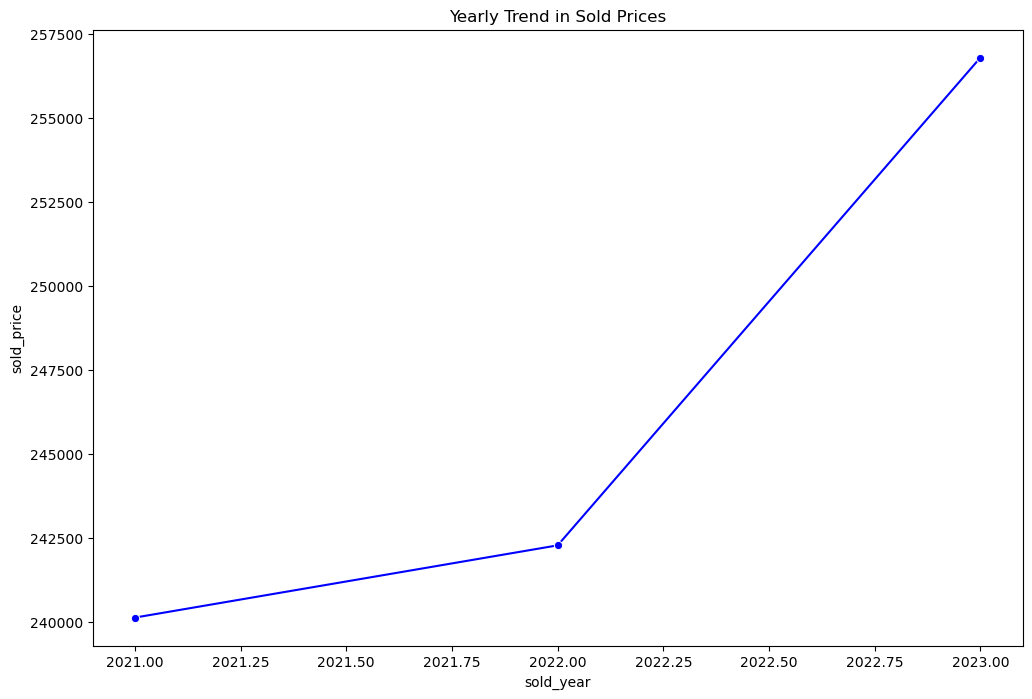

In [51]:
# Visualization 16: Yearly Trend in Sold Prices
plt.figure(figsize=(12, 8))
sns.lineplot(x='sold_year', y='sold_price', data=data, estimator='mean', ci=None, marker='o', color='b')
plt.title('Yearly Trend in Sold Prices')
plt.show()

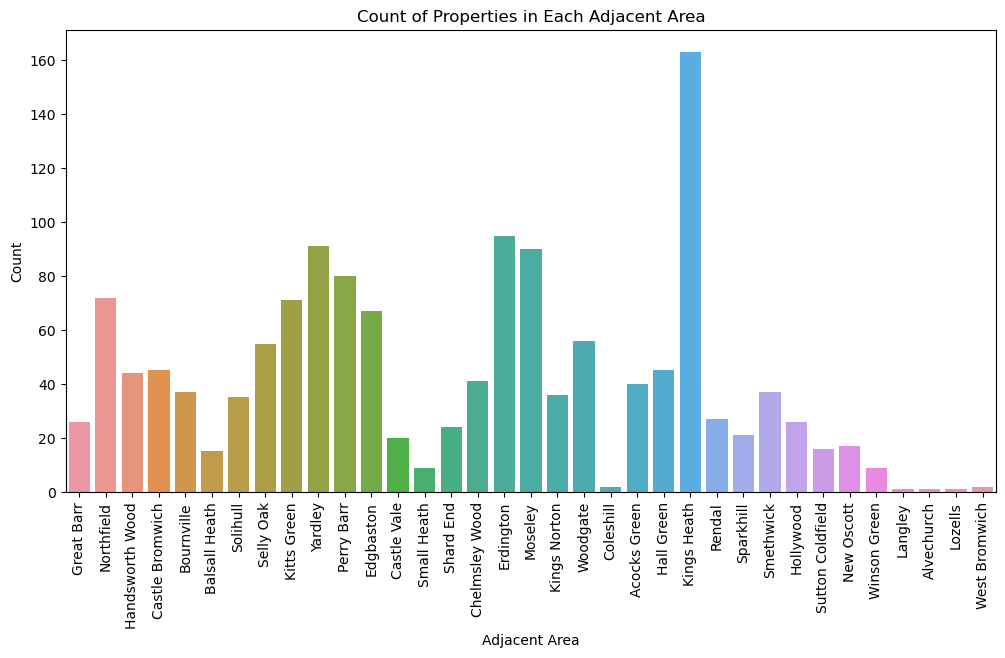

In [52]:
# Plotting a bar chart for the count of properties in each adjacent area with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(x='Adjacent_Area', data=data)
plt.title('Count of Properties in Each Adjacent Area')
plt.xlabel('Adjacent Area')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

In [53]:
unique_values = data['quarter'].unique()

print("Unique values of 'your_column':")
print(unique_values)

Unique values of 'your_column':
['q3' 'q1' 'q2' 'q4']


In [54]:
average_sold_price = data['sold_price'].mean()

# Display the result
print(f"The average sold price is: {average_sold_price}")

The average sold price is: 250688.91949434465
